### Required Dependencies

In [2]:
import pandas as pd, os, numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data Pre-Processing

In [3]:
cwd = os.getcwd()
dataset_file = os.path.join(cwd, "symptoms-dataset", "dataset.csv")

dataset_file

'C:\\Users\\DELL\\Desktop\\First Aid\\symptoms-dataset\\dataset.csv'

In [4]:
dataset = pd.read_csv(dataset_file, header=None) 
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.shape

(4920, 18)

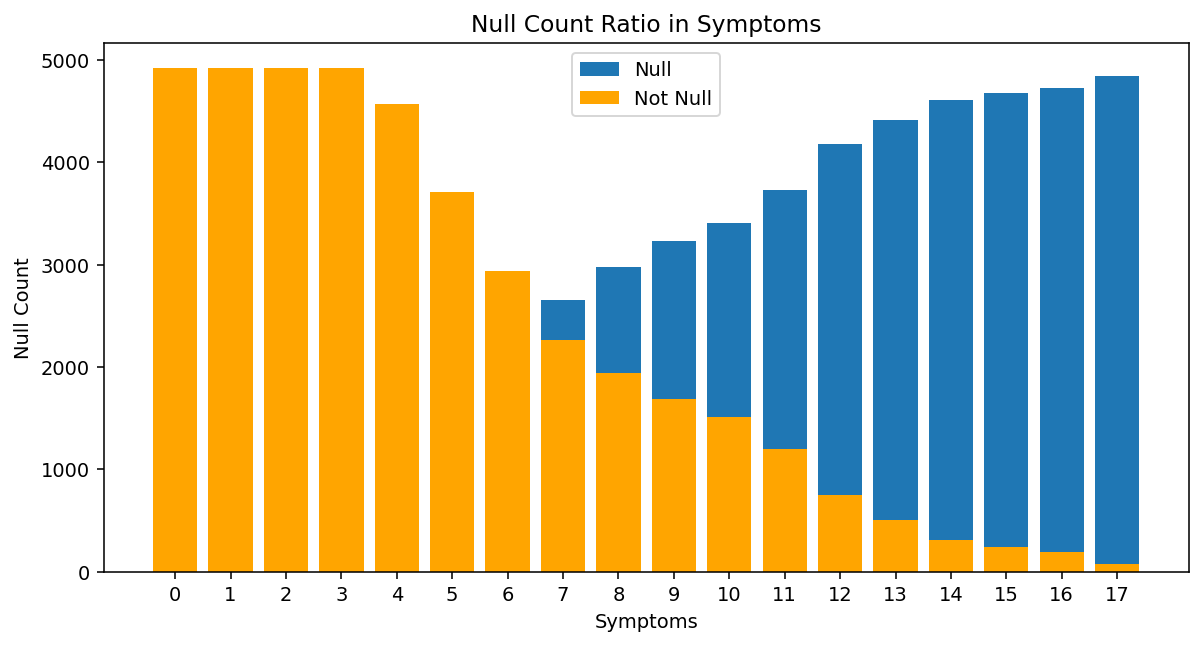

In [6]:
plt.figure(figsize=(10, 5), dpi=140)

ax = plt.subplot()
ax.bar([str(n) for n in dataset.isna().sum().keys()], dataset.isna().sum())
ax.bar([str(n) for n in dataset.notna().sum().keys()], dataset.notna().sum(), color="orange")

plt.xlabel("Symptoms")
plt.ylabel("Null Count")
plt.title("Null Count Ratio in Symptoms")
plt.legend(["Null", "Not Null"])

plt.show()

In [7]:
dataset.isna().sum()

0        0
1        0
2        0
3        0
4      348
5     1206
6     1986
7     2652
8     2976
9     3228
10    3408
11    3726
12    4176
13    4416
14    4614
15    4680
16    4728
17    4848
dtype: int64

In [8]:
dataset.fillna(0, inplace=True)
dataset.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [9]:
dataset.rename(columns = {0:"disease"}, inplace=True)
dataset.head(5)

,disease,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
dataset.describe()

,disease,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920
unique,41,34,48,54,51,39,33,27,22,23,22,19,12,9,5,4,4,2
top,Gastroenteritis,vomiting,vomiting,fatigue,high_fever,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,120,822,870,726,378,1206,1986,2652,2976,3228,3408,3726,4176,4416,4614,4680,4728,4848


In [11]:
disease_name = dataset["disease"].unique()
disease_name, len(disease_name)

(array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
        'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
        'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
        'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
        'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
        'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
        'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
        'Osteoarthristis', 'Arthritis',
        '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
        'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object), 41)

### Canonicalization

In [12]:
len(dataset.loc[0])

18

In [13]:
temp = pd.melt(dataset.reset_index(), id_vars = ["index"], value_vars = range(1,19)) 
temp["aggr_col"] = 1
temp.head()

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,index,variable,value,aggr_col
0,0,1,itching,1
1,1,1,skin_rash,1
2,2,1,itching,1
3,3,1,itching,1
4,4,1,itching,1


In [14]:
temp.value.unique(), len(temp.value.unique())

(array(['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
        ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
        ' muscle_wasting', ' patches_in_throat', ' fatigue',
        ' weight_loss', ' sunken_eyes', ' cough', ' headache',
        ' chest_pain', ' back_pain', ' weakness_in_limbs', ' chills',
        ' joint_pain', ' yellowish_skin', ' constipation',
        ' pain_during_bowel_movements', ' breathlessness', ' cramps',
        ' weight_gain', ' mood_swings', ' neck_pain', ' muscle_weakness',
        ' stiff_neck', ' pus_filled_pimples', ' burning_micturition',
        ' bladder_discomfort', ' high_fever', ' nodal_skin_eruptions',
        ' ulcers_on_tongue', ' loss_of_appetite', ' restlessness',
        ' dehydration', ' dizziness', ' weakness_of_one_body_side',
        ' lethargy', ' nausea', ' abdominal_pain', ' pain_in_anal_region',
        ' sweating', ' bruising', ' cold_hands_and_feets', ' anxiety',
        ' knee_pain', ' swelling_joints', ' 

In [15]:
canonicalized_ds = pd.pivot_table(temp, values = "aggr_col", index = "index", columns = "value")
canonicalized_ds[0] = dataset["disease"]
canonicalized_ds.rename(columns = {0:"label"}, inplace=True)
canonicalized_ds.fillna(0, inplace=True)
canonicalized_ds.head(15)

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train-Test Split

In [16]:
train_ds = canonicalized_ds.sample(frac = 0.75, random_state = 1)
test_ds = canonicalized_ds.drop(index = train_ds.index)

x_train, y_train, x_test , y_test = train_ds.drop("label", axis=1), train_ds["label"], test_ds.drop("label", axis=1), test_ds["label"]

In [17]:
len(x_train), len(y_train), len(x_train) + len(y_train)

(3690, 3690, 7380)

In [18]:
x_train.head()

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4604,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
cwd = os.getcwd()
path = os.path.join("symptoms-dataset", "train-test-split")
train_test_split_dir = os.path.join(cwd, path)
train_test_split_dir

'C:\\Users\\DELL\\Desktop\\First Aid\\symptoms-dataset\\train-test-split'

In [20]:
training_ds_file = os.path.join(train_test_split_dir,"train.csv")
testing_ds_file = os.path.join(train_test_split_dir,"test.csv")

train_ds_copy = train_ds.copy()
# train_ds_copy.drop(columns=[0], axis=1, inplace=True)

test_ds_copy = test_ds.copy()
# test_ds_copy.drop(columns=[0], axis=1, inplace=True)

In [21]:
train_ds_copy.to_csv(training_ds_file, index=False)
test_ds_copy.to_csv(testing_ds_file, index=False)

### Train-Test Data Distribution Visualization

In [62]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)

predicted_value = dtc.predict(x_test)
predicted_value

array(['Fungal infection', 'Fungal infection', 'Allergy', ...,
       'Heart attack', 'Hyperthyroidism', 'Arthritis'], dtype=object)

In [35]:
scores = cross_val_score(dtc, x_test, y_test, cv=10)
scores.mean()

0.9715447154471544

In [73]:
# import pickle
# with open('./symptom check model/check_symptoms.pkl', 'wb') as f:
#     pickle.dump(dtc, f)

In [74]:
# with open('./symptom check model/check_symptoms.pkl', 'rb') as f:
#     model = pickle.load(f)

In [77]:
import re
import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


training = pd.read_csv('symptoms-dataset/train-test-split/train.csv')
# print(training)
testing= pd.read_csv('symptoms-dataset/train-test-split/test.csv')
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']
y1= y


reduced_data = training.groupby(training['prognosis']).max()

#mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
testx    = testing[cols]
testy    = testing['prognosis']  
testy    = le.transform(testy)


clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
# print(clf.score(x_train,y_train))
# print ("cross result========")
scores = cross_val_score(clf, x_test, y_test, cv=3)
# print (scores)
print (scores.mean())


model=SVC()
model.fit(x_train,y_train)
print("for svm: ")
print(model.score(x_test,y_test))

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

def readn(nstr):
    engine = pyttsx3.init()

    engine.setProperty('voice', "english+f5")
    engine.setProperty('rate', 130)

    engine.say(nstr)
    engine.runAndWait()
    engine.stop()


severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

symptoms_dict = {}

for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


def getDescription():
    global description_list
    with open('MasterData/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)




def getSeverityDict():
    global severityDictionary
    with open('MasterData/symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass


def getprecautionDict():
    global precautionDictionary
    with open('MasterData/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)


def getInfo():
    print("-----------------------------------HealthCare ChatBot-----------------------------------")
    print("\nYour Name? \t\t\t\t",end="->")
    name=input("")
    print("Hello, ",name)

def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]
def sec_predict(symptoms_exp):
    df = pd.read_csv('Data/Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])


def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []

    while True:

        print("\nEnter the symptom you are experiencing  \t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            # print("Did you mean: ",cnf_dis,"?(yes/no) :",end="")
            # conf_inp = input("")
            # if(conf_inp=="yes"):
            #     break
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter valid input.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            # print( "You may have " +  present_disease )
            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            # dis_list=list(symptoms_present)
            # if len(dis_list)!=0:
            #     print("symptoms present  " + str(list(symptoms_present)))
            # print("symptoms given "  +  str(list(symptoms_given)) )
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])
                print(description_list[present_disease[0]])

                # readn(f"You may have {present_disease[0]}")
                # readn(f"{description_list[present_disease[0]]}")

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            # print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)

            # confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
            # print("confidence level is " + str(confidence_level))

    recurse(0, 1)
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)
print("----------------------------------------------------------------------------------------")



KeyError: 'prognosis'